In [1]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
# plt.rcParams['font.family'] = 'MS Gothic'

In [2]:
#---荷重データの読み込み---
f = np.loadtxt('force.csv', delimiter=',')
row, col = f.shape
print(f.shape)

(66, 3)


In [3]:
#---剛性行列の定義と行列式の確認---
K = np.array([[10, -1.2, 2.4],
              [-1.2, 15, -3.5],
              [2.4, -3.5, 6]])
# --- 正則性の確認 ---
if np.abs(np.linalg.det(K)) < 1e-15:
    print("行列式がほぼ0")
    exit()
else:
    print("正則行列のためデータ分析に進む")


正則行列のためデータ分析に進む


In [4]:
#---時刻データの定義---
x = range(row) #1000Hzのため データ数=時刻で問題ない

In [5]:
#---変位予測値(理論値)の計算
u0z = [] #z方向変異の理論値(リスト)
for i in range(row):
    fi=f[i,:].reshape(3,1)
    u0i=np.linalg.inv(K) @ fi
    u0z.append(u0i[2,0])

In [9]:
# ---- 位計測値の読み込み
u1=np.loadtxt('deformation.csv', delimiter=',')
u1z= u1[:,2].reshape (row, 1) # 2方向変位の計測値 (ベクトル)
print(u1)
print(u1z)

[[-5.0400e-03 -2.2240e-02  2.3560e-02]
 [ 3.7000e-02 -1.7050e-02  5.9700e-02]
 [-5.5500e-03 -4.2400e-03  5.2080e-02]
 [ 6.0150e-02  4.6300e-02  9.9000e-03]
 [-7.4300e-03 -1.7060e-02  2.5470e-02]
 [ 5.4600e-03  5.2980e-02  5.7250e-02]
 [ 1.8910e-02  6.4490e-02  1.2093e-01]
 [ 3.3200e-03  4.0480e-02  5.8420e-02]
 [ 1.5940e-02  4.3010e-02  1.0097e-01]
 [ 9.1500e-02  6.4030e-02  7.4650e-02]
 [ 7.2880e-02  2.3190e-02  1.1526e-01]
 [ 1.0133e-01  2.1180e-02  1.1667e-01]
 [ 7.8810e-02  4.9440e-02  1.6425e-01]
 [ 1.2508e-01  4.6570e-02  1.0688e-01]
 [ 1.3810e-01  3.8320e-02  1.2021e-01]
 [ 1.6294e-01  8.5060e-02  1.3286e-01]
 [ 1.6636e-01  7.7220e-02  1.3473e-01]
 [ 1.1740e-01  6.7040e-02  9.5140e-02]
 [ 1.2305e-01  6.6630e-02  1.3233e-01]
 [ 1.9540e-01  6.7630e-02  1.3942e-01]
 [ 1.8873e-01  1.0697e-01  1.5523e-01]
 [ 1.5011e-01  4.7180e-02  9.7740e-02]
 [ 1.7307e-01  6.5490e-02  7.8380e-02]
 [ 2.1874e-01  4.2770e-02  7.7360e-02]
 [ 2.5575e-01  6.8930e-02  3.1960e-02]
 [ 2.3640e-01  5.4910e-02

Text(0.5, 1.0, '「230450066_清水菜々美」の変位グラフ(z方向)')

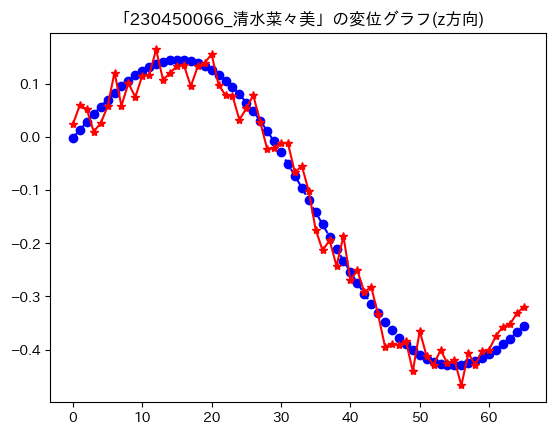

In [7]:
# ----Z方向荷重の抽出 (ベクトル)---
fz=f[:,2].reshape(row,1)
#---以上で作図の準備はできた---
#(1)
plt.plot(x,u0z, marker='o', linestyle='--',color='blue')
plt.plot(x,u1z, marker='*', linestyle='-',color='red')
plt.title('「230450066_清水菜々美」の変位グラフ(z方向)')

Text(0.5, 1.0, '「230450066_清水菜々美」の荷重-変位曲線(z方向)')

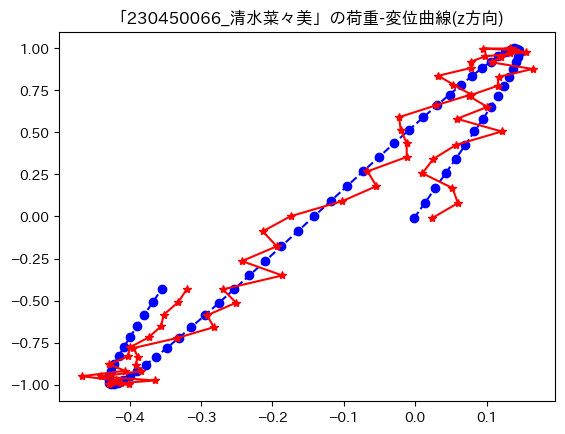

In [8]:
#(2)
plt.plot(u0z,fz, marker='o', linestyle='--',color='blue')
plt.plot(u1z, fz, marker='*', linestyle='-',color='red')
plt.title('「230450066_清水菜々美」の荷重-変位曲線(z方向)')